In [1]:
%matplotlib inline
%pylab inline
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
import palettable as pal
import matplotlib as mpl
import numpy
import pyupset as pyu
# mpl.rcParams['font.sans-serif']='Arial'
# mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [2]:
special_flowers = ['MMETSP0693', 'MMETSP1019', 'MMETSP0923', 'MMETSP0008', 'MMETSP1002', 'MMETSP1325', 'MMETSP1018', 
                   'MMETSP1346', 'MMETSP0088', 'MMETSP0092', 'MMETSP0717', 'MMETSP0223', 'MMETSP0115', 'MMETSP0196', 
                   'MMETSP0197', 'MMETSP0398', 'MMETSP0399', 'MMETSP0922']

In [3]:
# transrate score metrics
#file_ncgr_transrate_scores = "../assembly_evaluation_data/transrate_scores_imicrobe_cds.csv"
#file_dib_transrate_scores = "../assembly_evaluation_data/transrate_scores_trinity-2.2.0.csv"
#ncgr_transrate_score = pd.read_csv(file_ncgr_transrate_scores, index_col='SampleName')
#dib_transrate_score = pd.read_csv(file_dib_transrate_scores, index_col='SampleName')
#transrate reference metrics
#file_ncgr_transrate_nt = "../assembly_evaluation_data/transrate_reverse_ncgr.nt_v_trinity2.2.0.csv"
#file_dib_transrate_nt = "../assembly_evaluation_data/transrate_reference_trinity2.2.0_v_ncgr.nt.csv"
#ncgr_transrate_nt = pd.read_csv(file_ncgr_transrate_nt, index_col='SampleName')
#dib_transrate_nt = pd.read_csv(file_dib_transrate_nt, index_col='SampleName')
# dammit gene names comparison
unique_names = pd.read_csv("../assembly_evaluation_data/unique_gene_names_ncgr_dib.csv")

In [4]:
giant_matrix = "../assembly_evaluation_data/MMETSP_all_evaluation_matrix.csv"
all_metrics = pd.read_csv(giant_matrix)
#all_metrics.columns.values
# transrate score metrics
all_metrics = all_metrics[~all_metrics['SampleName'].isin(special_flowers)]
ncgr_cds_transrate_score = all_metrics[['SampleName', 'score.y']]
ncgr_nt_transrate_score = all_metrics[['SampleName','score.x']]
dib_transrate_score = all_metrics[['SampleName','score']]
ncgr_nt_transrate_score.columns = ['SampleName','score']
ncgr_cds_transrate_score.columns = ['SampleName','score']
#transrate reference metrics
ncgr_transrate_nt = all_metrics[['SampleName','p_refs_with_CRBB.y','n_seqs.x','mean_orf_percent.x']]
dib_transrate_nt = all_metrics[['SampleName','p_refs_with_CRBB','n_seqs','mean_orf_percent']]
ncgr_transrate_nt.columns = ['SampleName','p_refs_with_CRBB','n_seqs','mean_orf_percent']
#ncgr_transrate_nt.shape


In [5]:
all_metrics.shape

(660, 289)

In [6]:
dib_transrate_nt.shape

(660, 4)

In [7]:
#dib_transrate_nt = dib_transrate_nt.drop_duplicates()
#ncgr_transrate_nt = ncgr_transrate_nt.drop_duplicates()
dib_transrate_nt = dib_transrate_nt.dropna()
ncgr_transrate_nt = ncgr_transrate_nt.dropna()

In [8]:
ncgr_transrate_nt.shape

(639, 4)

In [9]:
dib_transrate_nt.shape

(644, 4)

In [10]:
ncgr_cds_transrate_score.shape

(660, 2)

In [11]:
ncgr_nt_transrate_score.shape

(660, 2)

In [12]:
dib_transrate_score.shape

(660, 2)

In [13]:
#ncgr_cds_transrate_score = ncgr_cds_transrate_score.drop_duplicates()
#ncgr_nt_transrate_score = ncgr_nt_transrate_score.drop_duplicates()
#dib_transrate_score = dib_transrate_score.drop_duplicates()
ncgr_cds_transrate_score = ncgr_cds_transrate_score.dropna()
ncgr_nt_transrate_score = ncgr_nt_transrate_score.dropna()
dib_transrate_score = dib_transrate_score.dropna()

In [14]:
ncgr_cds_transrate_score.shape

(630, 2)

In [15]:
ncgr_nt_transrate_score.shape

(639, 2)

In [16]:
dib_transrate_score.shape

(653, 2)

In [17]:
# dammit gene names comparison
gene_names = unique_names.drop_duplicates()
# giant matrix of all metrics, including phyla
#all_metrics = all_metrics.drop_duplicates()

In [18]:
#checking the comparison of the two sets. 
ddd=set(dib_transrate_nt.index) #special flowers are missing
ncnc=set(ncgr_transrate_nt.index)
len(ddd.intersection(ncnc))

638

In [53]:
def scatter_diff(df1, df2, column, fig, ax, df1name = 'df1', df2name = 'df2', 
                 color1='red', color2='#018E42', ymin=0, ymax=1, ypos=.95):
    # plot scatter differences between two dfs with the same columns
    # create new df for data comparison
    
    combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
    newdf=pd.DataFrame(index=combined_df.index)
    newdf[df1name]=combined_df[column+'_x']
    newdf[df2name]=combined_df[column+'_y']

    # plot with different colors if df1 > or < then df2
    
    newdf.loc[newdf[df1name] > newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                          color = color1, alpha = 0.6, lw=2)
    newdf.loc[newdf[df1name] <= newdf[df2name], [df1name, df2name]].T.plot(ax=ax, legend = False, 
                                                                           color = color2, alpha = 0.2, lw=2)
    # prints numbers higher in DIB or NCGR assemblies
    #ax.text(-.1, ypos, str(len(newdf.loc[newdf[df1name] > newdf[df2name]])), 
            #color= color1, fontsize='x-large', fontweight='heavy')
    #ax.text(.95, ypos, str(len(newdf.loc[newdf[df1name] <= newdf[df2name]])), 
            #color= color2, fontsize='x-large', fontweight='heavy')

    # aesthetics 
    ax.set_xlim(-.15, 1.3)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([0,1])
    ax.set_xticklabels([df1name, df2name], fontsize='large', fontweight='bold', fontname='Arial')
    ax.set_axis_bgcolor('white')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize='x-large')
    ax.tick_params(axis='x', which='both', top='off', bottom='off')
    ax.tick_params(axis='y', which='both', right='off')
    for tick in ax.get_yticklabels():
        tick.set_fontname("Arial")

    return newdf, fig, ax
    

def violin_split(df, col1, col2, fig, ax, color2='red', color1='#018E42', ymin=0, ymax=1):
    #create split violine plots
    v1 = ax.violinplot(df[col1],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v1['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        b.set_color(color2)
        b.set_alpha(0.5)
    v2 = ax.violinplot(df[col2],
                   showmeans=False, showextrema=False, showmedians=False)
    for b in v2['bodies']:
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_color(color1)
        b.set_alpha(0.5)
    
    [x1,x2]=ax.get_xlim()
    #plot NCGR mean
    ax.plot([0,1], [df[col1].mean()]*2,'--', color='black')
    #plot DIB mean
    ax.plot([1,2], [df[col2].mean()]*2, '--', color='#004F24')
    calc_value_ncgr = round(df[col1].mean(),2)
    calc_value_dib = round(df[col2].mean(),2)
    if calc_value_ncgr >= 1000:
        calc_value_ncgr = str(int(calc_value_ncgr/1000)) + "K"
    if calc_value_dib >= 1000:
        calc_value_dib = str(int(calc_value_dib/1000)) + "K"
    calc_value_ncgr = str(calc_value_ncgr)
    calc_value_dib = str(calc_value_dib)
    ax.text(0.5+x1/2, df[col1].mean(), calc_value_ncgr, fontsize='x-large', fontweight='bold',
            multialignment='center', fontname='Arial')
    ax.text(0.5+x2/2, df[col2].mean(), calc_value_dib, fontsize='x-large', fontweight='bold',
            multialignment='center', fontname='Arial')

    ax.set_xlim(x1,x2)
    ax.set_xticks([])
    #ax.set_xticklabels(['NCGR', 'DIB'], fontsize='large', fontweight='bold', fontname='Arial')
    ax.set_ylim([ymin, ymax])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis= 'both',labelsize='x-large')
    #ax.set_axis_bgcolor('white')
    ax.set_yticklabels('')
    ax.tick_params(axis='x', which='both', top='off', bottom='off')
    #ax.tick_params(axis='x', which='both', top='off')
    ax.tick_params(axis='y', which='both', right='off')

def create_plots(df1, df2, column, col_title, df1name = 'NCGR', df2name = 'DIB', ymax = 1, ymin = 0, ypos = 0.90):
    fig, axs = plt.subplots(1,2)
    fig.set_size_inches(6,6)
    outdf, fig, ax = scatter_diff(df1, df2, column = column, 
                 fig = fig, ax = axs[0], df1name = df1name, df2name = df2name, 
                                  ymax = ymax, ymin = ymin, ypos = ypos)
    violin_split(outdf, df1name, df2name, fig, axs[1], ymin = ymin, ymax = ymax)
    fig.suptitle(col_title, fontsize = 'x-large', fontweight = 'bold', fontname='Arial')
    
    return outdf, fig, ax

# Figure 2

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


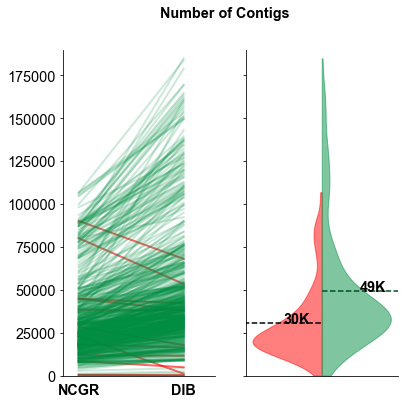

In [54]:
p_refs,fig, ax = create_plots(ncgr_transrate_nt,dib_transrate_nt, 'n_seqs', 'Number of Contigs',ymax=190000, ypos=55000)

fig.savefig('../paper/n_contigs.pdf',bbox_inches="tight")
fig.savefig('../paper/n_contigs.png',bbox_inches="tight")

# Figure 3

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


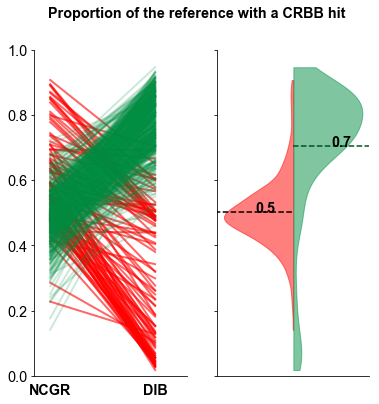

In [38]:
p_refs,fig, ax = create_plots(ncgr_transrate_nt,dib_transrate_nt, 'p_refs_with_CRBB', 'Proportion of the reference with a CRBB hit',ymax=1, ypos=1)

fig.savefig('../paper/CRB-blast.pdf',bbox_inches="tight")
fig.savefig('../paper/CRB-blast.png',bbox_inches="tight")

In [22]:
ncgr_cds_transrate_score.head()

,SampleName,score
0,MMETSP0004,0.22481
1,MMETSP0005,0.22807
2,MMETSP0006,0.19486
3,MMETSP0007,0.08813
6,MMETSP0009,0.19473


/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


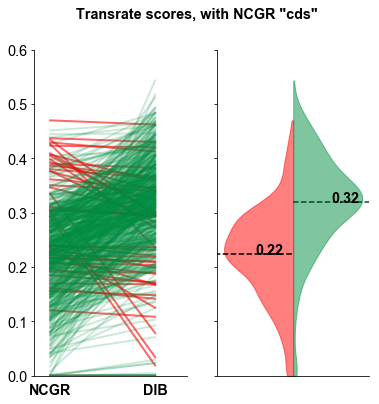

In [55]:
score,fig, ax = create_plots(ncgr_cds_transrate_score,dib_transrate_score, 'score', 'Transrate scores, with NCGR "cds"',ymax=.6, ypos=0.55)
savefig('../paper/transrate_cds.png',bbox_inches="tight")
savefig('../paper/transrate_cds.pdf',bbox_inches="tight")

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


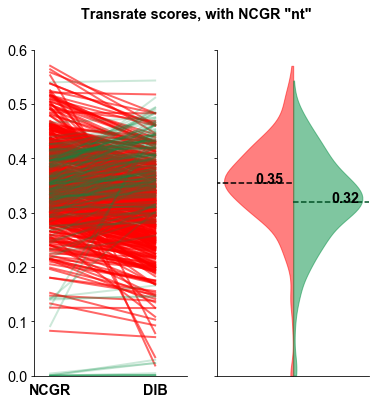

In [41]:
score,fig, ax = create_plots(ncgr_nt_transrate_score,dib_transrate_score, 'score', 'Transrate scores, with NCGR "nt"',ymax=.6, ypos=0.55)
savefig('../paper/transrate_nt.png',bbox_inches="tight")
savefig('../paper/transrate_nt.pdf',bbox_inches="tight")

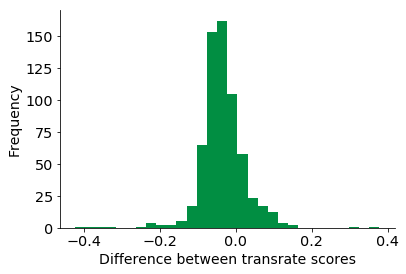

In [74]:
from matplotlib.patches import Ellipse, Polygon
ncgr_tmp = ncgr_nt_transrate_score.set_index("SampleName")
dib_tmp = dib_transrate_score.set_index("SampleName")
diff_tmp = dib_tmp - ncgr_tmp
ax = diff_tmp.plot(kind='hist', bins=30,legend=False,color='#018E42')
ax.set_xlabel("Difference between transrate scores",fontsize=14)
ax.set_ylabel("Frequency",fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis= 'both',labelsize='x-large')
ax.tick_params(axis='x', which='both', top='off')
#ax.tick_params(axis='y', which='both', right='off')
savefig('../paper/hist_transrate_diff.pdf',bbox_inches="tight")
savefig('../paper/hist_transrate_diff.png',bbox_inches="tight")

# Figure 4

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


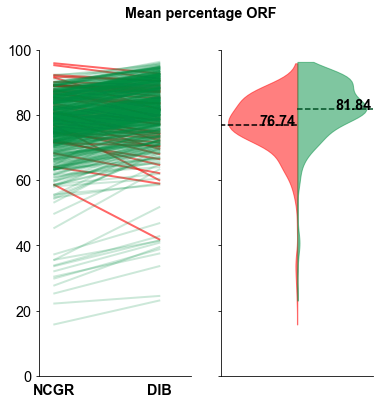

In [42]:
p_refs,fig, ax = create_plots(ncgr_transrate_nt,dib_transrate_nt, 'mean_orf_percent', 'Mean percentage ORF',ymax=100, ypos=100)
savefig('../paper/mean_ORF.pdf',bbox_inches="tight")
savefig('../paper/mean_ORF.png',bbox_inches="tight")

In [43]:
imicrobe_busco = all_metrics[['SampleName','NCGR.Complete_eukaryotic_BUSCO_perc']]
imicrobe_busco.columns = ['SampleName','Complete_eukaryotic_BUSCO_perc']
imicrobe_busco = imicrobe_busco.dropna()

In [44]:
dib_busco = all_metrics[['SampleName','DIB.Complete_eukaryotic_BUSCO_perc']]
dib_busco.columns = ['SampleName','Complete_eukaryotic_BUSCO_perc']
dib_busco = dib_busco.dropna()

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


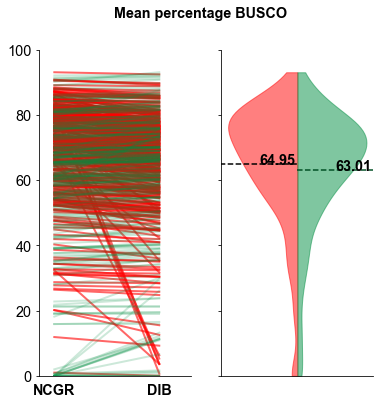

In [45]:
p_refs,fig, ax = create_plots(imicrobe_busco,dib_busco, 'Complete_eukaryotic_BUSCO_perc', 'Mean percentage BUSCO',ymax=100, ypos=100)
savefig('../paper/mean_BUSCO.png',bbox_inches="tight")
savefig('../paper/mean_BUSCO.pdf',bbox_inches="tight")

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


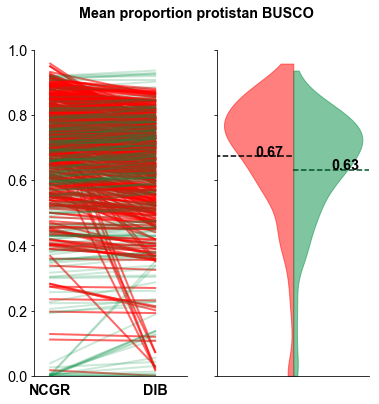

In [46]:
dib_busco = all_metrics[['SampleName','DIB.Complete_protist_BUSCO_prop']]
dib_busco.columns = ['SampleName','Complete_protist_BUSCO_prop']
dib_busco = dib_busco.dropna()
imicrobe_busco = all_metrics[['SampleName','NCGR.Complete_protist_BUSCO_prop']]
imicrobe_busco.columns = ['SampleName','Complete_protist_BUSCO_prop']
imicrobe_busco = imicrobe_busco.dropna()

p_refs,fig, ax = create_plots(imicrobe_busco,dib_busco, 'Complete_protist_BUSCO_prop', 'Mean proportion protistan BUSCO',ymax=1.0, ypos=1.0)

savefig('../paper/mean_protist_BUSCO.png',bbox_inches="tight")
savefig('../paper/mean_protist_BUSCO.pdf',bbox_inches="tight")

# BUSCO v3

In [47]:
dib_busco_v3_euk = pd.read_csv("../assembly_evaluation_data/busco_scores_v3_dib_eukaryota.csv")
dib_busco_v3_protist = pd.read_csv("../assembly_evaluation_data/busco_scores_v3_dib_protist.csv")
ncgr_busco_v3_euk = pd.read_csv("../assembly_evaluation_data/busco_scores_v3_imicrobe_eukaryota.csv")
ncgr_busco_v3_protist = pd.read_csv("../assembly_evaluation_data/busco_scores_v3_imicrobe_protist.csv")

In [48]:
dib_busco_v3_protist.head()

,Unnamed: 0,Complete,Fragmented,Missing,Total,Complete_BUSCO_perc
0,MMETSP0052,86,5,124,215,0.400000
1,MMETSP1370,95,4,116,215,0.441860
2,MMETSP0941,118,4,93,215,0.548837
3,MMETSP0574,116,2,97,215,0.539535
4,MMETSP0167,56,2,157,215,0.260465


In [49]:
dib_busco_v3_euk.columns = [['SampleName','Complete','Fragmented','Missing','Total','Complete_BUSCO_perc']]
dib_busco_v3_euk = dib_busco_v3_euk[['SampleName','Complete_BUSCO_perc']]
dib_busco_v3_protist.columns = [['SampleName','Complete','Fragmented','Missing','Total','Complete_BUSCO_perc']]
dib_busco_v3_protist = dib_busco_v3_protist[['SampleName','Complete_BUSCO_perc']]
ncgr_busco_v3_euk.columns = [['SampleName','Complete','Fragmented','Missing','Total','Complete_BUSCO_perc']]
ncgr_busco_v3_euk = ncgr_busco_v3_euk[['SampleName','Complete_BUSCO_perc']]
ncgr_busco_v3_protist.columns = [['SampleName','Complete','Fragmented','Missing','Total','Complete_BUSCO_perc']]
ncgr_busco_v3_protist = ncgr_busco_v3_protist[['SampleName','Complete_BUSCO_perc']]

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


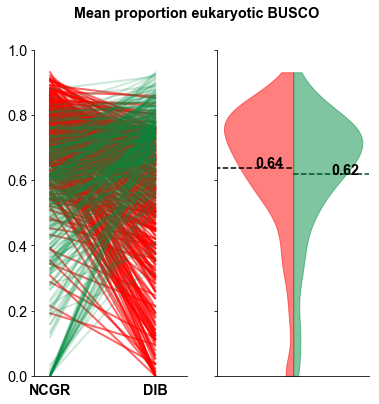

In [50]:
p_refs,fig, ax = create_plots(ncgr_busco_v3_euk,dib_busco_v3_euk,'Complete_BUSCO_perc', 'Mean proportion eukaryotic BUSCO',ymax=1.0, ypos=1.0)

/Users/johnsolk/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


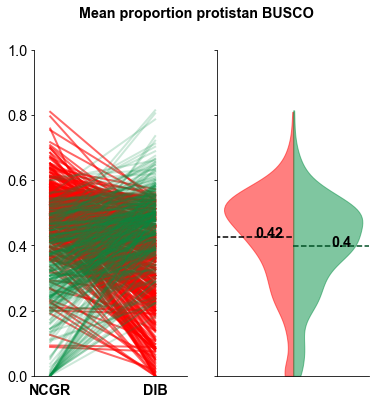

In [51]:
p_refs,fig, ax = create_plots(ncgr_busco_v3_protist,dib_busco_v3_protist,'Complete_BUSCO_perc', 'Mean proportion protistan BUSCO',ymax=1.0, ypos=1.0)

In [52]:
ncgr_busco_v3_protist.shape

(675, 2)

# Table 1

In [37]:
# busco version 3
#file_busco_dib_v3 = "../assembly_evaluation_data/transrate_reverse_ncgr.nt_v_trinity2.2.0.csv"
#file_busco_ncgr_v3 = "../assembly_evaluation_data/transrate_reference_trinity2.2.0_v_ncgr.nt.csv"
#ncgr_transrate_nt = pd.read_csv(file_ncgr_transrate_nt, index_col='SampleName')
#dib_transrate_nt = pd.read_csv(file_dib_transrate_nt, index_col='SampleName')

In [38]:
df1=ncgr_transrate_nt
df2=dib_transrate_nt
column='p_refs_with_CRBB'
df1name = 'df1'
df2name = 'df2'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
newdf=pd.DataFrame(index=combined_df.index)
newdf[df1name]=combined_df[column+'_x']
newdf[df2name]=combined_df[column+'_y']
print('NCGR:',len(newdf.loc[newdf[df1name] > newdf[df2name]]))
print('DIB:',len(newdf.loc[newdf[df1name] <= newdf[df2name]]))

NCGR: 100
DIB: 538


In [39]:
df1=ncgr_transrate_nt
df2=dib_transrate_nt
column='n_seqs'
df1name = 'df1'
df2name = 'df2'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
newdf=pd.DataFrame(index=combined_df.index)
newdf[df1name]=combined_df[column+'_x']
newdf[df2name]=combined_df[column+'_y']
print('NCGR:',len(newdf.loc[newdf[df1name] > newdf[df2name]]))
print('DIB:',len(newdf.loc[newdf[df1name] <= newdf[df2name]]))

NCGR: 12
DIB: 626


In [40]:
df1=ncgr_transrate_nt
df2=dib_transrate_nt
column='mean_orf_percent'
df1name = 'df1'
df2name = 'df2'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
newdf=pd.DataFrame(index=combined_df.index)
newdf[df1name]=combined_df[column+'_x']
newdf[df2name]=combined_df[column+'_y']
print('NCGR:',len(newdf.loc[newdf[df1name] > newdf[df2name]]))
print('DIB:',len(newdf.loc[newdf[df1name] <= newdf[df2name]]))

NCGR: 42
DIB: 596


In [41]:
df1.head()

,SampleName,p_refs_with_CRBB,n_seqs,mean_orf_percent
0,MMETSP0004,0.45255,24327.0,72.04233
1,MMETSP0005,0.47173,25033.0,72.09239
2,MMETSP0006,0.45844,30986.0,73.27725
3,MMETSP0007,0.59737,21267.0,66.31098
6,MMETSP0009,0.45785,30594.0,74.44895


In [42]:
df1=ncgr_cds_transrate_score
df2=dib_transrate_score
column='score'
df1name = 'df1'
df2name = 'df2'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
newdf=pd.DataFrame(index=combined_df.index)
newdf[df1name]=combined_df[column+'_x']
newdf[df2name]=combined_df[column+'_y']
print('NCGR:',len(newdf.loc[newdf[df1name] > newdf[df2name]]))
print('DIB:',len(newdf.loc[newdf[df1name] <= newdf[df2name]]))

NCGR: 44
DIB: 583


In [43]:
df1=ncgr_nt_transrate_score
df2=dib_transrate_score
column='score'
df1name = 'df1'
df2name = 'df2'
combined_df = pd.merge(df1, df2, left_index=True, right_index=True)
newdf=pd.DataFrame(index=combined_df.index)
newdf[df1name]=combined_df[column+'_x']
newdf[df2name]=combined_df[column+'_y']
print('NCGR:',len(newdf.loc[newdf[df1name] > newdf[df2name]]))
print('DIB:',len(newdf.loc[newdf[df1name] <= newdf[df2name]]))

NCGR: 495
DIB: 143


# Figure 5

In [44]:
data_table = pd.read_csv("../assembly_evaluation_data/merged_annotation_stats.csv",index_col='SampleName')
false_crbb = pd.read_csv("../assembly_evaluation_data/false_crbb.csv",index_col=0)

In [45]:
false_crbb.head()

,false_crbb_num_transcripts
MMETSP1347,812
MMETSP0603,5341
MMETSP0469,101484
MMETSP1075,57113
MMETSP1369,46402


In [46]:
crbb_df = pd.merge(data_table[['total_annotated_w_false_crbb']],false_crbb[['false_crbb_num_transcripts']],
                   how='outer',left_index=True,right_index=True).dropna()

In [47]:
crbb_df['difference']=crbb_df.false_crbb_num_transcripts-crbb_df.total_annotated_w_false_crbb

In [48]:
crbb_df.head()

,total_annotated_w_false_crbb,false_crbb_num_transcripts,difference
MMETSP0004,2352,12265.0,9913.0
MMETSP0005,1833,9950.0,8117.0
MMETSP0006,4837,22569.0,17732.0
MMETSP0007,1448,5599.0,4151.0
MMETSP0010,4022,21159.0,17137.0


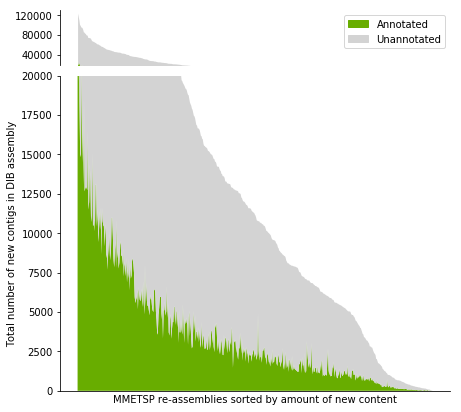

In [49]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

pl.figure(figsize=(7, 7))

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

gs = gridspec.GridSpec(6, 6)
ax = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1:,:])

crbb_df.sort_values(by='false_crbb_num_transcripts', 
                    ascending=False)[['total_annotated_w_false_crbb','difference']].plot(kind='area', 
                    color=[ '#68ad00','lightgrey'], lw=0, ax=ax)
red_patch = mpatches.Patch(color='#68ad00', label='Annotated')
blue_patch = mpatches.Patch(color='lightgrey',label='Unannotated')
ax.legend(handles=[red_patch,blue_patch])

# alternative legend labels:
# transcripts absent from NCGR
# annotated absent transcripts
crbb_df.sort_values(by='false_crbb_num_transcripts', 
                    ascending=False)[['total_annotated_w_false_crbb','difference']].plot(kind='area', 
                    color=[ '#68ad00','lightgrey'], lw=0, ax=ax2, legend=False)
ax.set_ylim([20000,130000])
ax2.set_ylim([0,20000])
simpleaxis(ax)
simpleaxis(ax2)
ax.spines['bottom'].set_visible(False)
ax2.set_xticks([])
ax.set_xticks([])
ax.set_yticks(np.arange(40000,120001,40000))
ax2.set_xlabel("MMETSP re-assemblies sorted by amount of new content")
ax2.set_ylabel("Total number of new contigs in DIB assembly")
savefig('../paper/false_crbb.png')
savefig('../paper/false_crbb.pdf')